In [13]:
excel_file_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'

In [35]:
import pandas as pd
excel_file_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'
# Replace 'your_file.xlsx' with the actual path to your Excel file
# Read the Excel file
data = pd.read_excel(excel_file_path, skiprows=[0])

# Define the indices for the columns you're interested in (0-based indexing)
column2_index = 1  # Replace with the correct index for column 2
column3_index = 2  # Replace with the correct index for column 3

# Filter out rows where column 3 has a value but column 2 is blank
filtered_data = data[data.iloc[:, column2_index].notna() | data.iloc[:, column3_index].isna()]

# Extract the second and third columns from the filtered data and convert them to lists
second_column = filtered_data.iloc[:, column2_index].tolist()
third_column = filtered_data.iloc[:, column3_index].tolist()

# Remove 'NaN' values from the lists
indices = [int(value) for value in second_column if not pd.isna(value)]
case_numbers = [int(value) for value in third_column if not pd.isna(value)]

print("Index:", indices)
print("Case:", case_numbers)


Index: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
Case: [22, 24, 28, 29, 30, 32, 34, 36, 38, 39, 42, 43, 44, 46, 31, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 74, 76, 77, 78, 79, 80, 81, 82, 72, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 27, 37]


In [47]:

def find_files(folder_path):
    vx3_file = None
    mask_file = None
    label_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == "Vx3.nrrd":
                vx3_file = os.path.join(root, file)
            elif file.endswith(".mask.nii.gz"):
                mask_file = os.path.join(root, file)
            elif file.endswith("label.nrrd"):
                label_file = os.path.join(root, file)
        
        if vx3_file and mask_file and label_file:
            break  # All files are found, exit the loop
    
    return vx3_file, mask_file, label_file

folder_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428/"  # Replace with the actual path to your folder
vx3_file, mask_file, label_file = find_files(folder_path)

if vx3_file and mask_file and label_file:
    print("All files were found.")
    print("Vx3 File:", vx3_file)
    print("Mask File:", mask_file)
    print("Label File:", label_file)
else:
    print("One or more files were not found.")


All files were found.
Vx3 File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428/seg_net\SPI-JH110088-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz
Label File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428/MarkUps\88-Jensen\S-Final-2-label.nrrd


In [49]:
# 100 YES WORKING TO FIND ALL THREE FILES CONTAINED WITHIN THE subdirectory 1-DONE
import os
import pandas as pd

excel_file_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'
# Read the Excel file
data = pd.read_excel(excel_file_path, skiprows=[0])

# Define the indices for the columns you're interested in (0-based indexing)
column2_index = 1  # Replace with the correct index for column 2
column3_index = 2  # Replace with the correct index for column 3

# Filter out rows where column 3 has a value but column 2 is blank
filtered_data = data[data.iloc[:, column2_index].notna() | data.iloc[:, column3_index].isna()]

# Extract the second and third columns from the filtered data and convert them to lists
second_column = filtered_data.iloc[:, column2_index].tolist()
third_column = filtered_data.iloc[:, column3_index].tolist()

# Remove 'NaN' values from the lists
indices = [int(value) for value in second_column if not pd.isna(value)]
case_numbers = [int(value) for value in third_column if not pd.isna(value)]

def find_files(folder_path):
    vx3_file = None
    mask_file = None
    label_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == "Vx3.nrrd":
                vx3_file = os.path.join(root, file)
            elif file.endswith(".mask.nii.gz"):
                mask_file = os.path.join(root, file)
            elif file.endswith("label.nrrd"):
                label_file = os.path.join(root, file)
        
        if vx3_file and mask_file and label_file:
            break  # All files are found, exit the loop
    
    return vx3_file, mask_file, label_file

base_folder = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/"

for case_number in case_numbers:
    case_folder_prefix = f"Case-{case_number}-"
    
    for folder in os.listdir(base_folder):
        if folder.startswith(case_folder_prefix):
            folder_path = os.path.join(base_folder, folder)
            vx3_file, mask_file, label_file = find_files(folder_path)

            if vx3_file and mask_file and label_file:
                print("All files were found for", folder)
                print("Vx3 File:", vx3_file)
                print("Mask File:", mask_file)
                print("Label File:", label_file)
                print()
            else:
                print("One or more files were not found for", folder)


All files were found for Case-22-0.5_A_80KV_Qr40d_3_53062428
Vx3 File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428\MarkUps\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428\seg_net\SPI-JH110088-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz
Label File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428\MarkUps\88-Jensen\S-Final-2-label.nrrd

All files were found for Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502
Vx3 File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502\Markups\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502\seg_net\SPI-JH110704-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz
Label File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1

In [ ]:
import os

# List of case numbers you want to search for
  # Add more case numbers as needed

# Root directory to start the search
root_directory = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/"

# Loop through the case numbers
for case_number in case_numbers:
    case_prefix = f"Case-{case_number}-"
    
    # Function to filter folders that start with the case prefix
    def case_folder_filter(folder_name):
        return folder_name.startswith(case_prefix)

    # Find matching case folders
    matching_case_folders = list(filter(case_folder_filter, os.listdir(root_directory)))

    if not matching_case_folders:
        print(f"No matching folders found for Case {case_number}.")
        continue

    case_folder = os.path.join(root_directory, matching_case_folders[0])

    # Files to search for
    required_files = [".mask.nii.gz", "Vx3.nrrd", "label.nrrd"]

    found_files = []

    # Loop through subfolders of the case folder
    for subdir, _, files in os.walk(case_folder):
        for file in files:
            if any(file.endswith(ext) for ext in required_files):
                found_files.append(file)

    if len(found_files) == len(required_files):
        print(f"All required files found in Case {case_number}.")
    else:
        missing_files = set(required_files) - set(found_files)
        print(f"Missing files in Case {case_number}: {', '.join(missing_files)}")


Data Shape: (820, 506, 568)
Data Type: int16
Header: OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([820, 506, 568])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-154.4,  -76.8, -203.9]))])
Reading Vx3...
Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006)


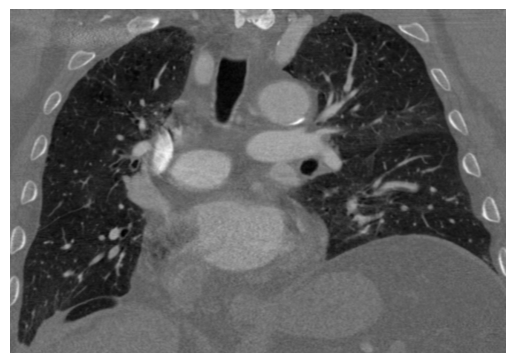

Window Level Adjusted!


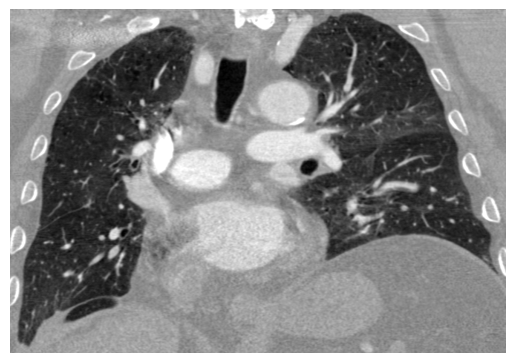

Image saved at: z:/Q- Figures&Reports/T32-Poster/Nate/Case-59\QC-Images\Case-59-QC_Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Origin:  (-154.40000000000003, -76.80000000000001, -203.89999999999998)
Dimensions:  (820, 506, 568)
Center:  [  1.4   19.34 -95.98]
Camera Position [  1.4  519.34 -95.98]
Camera Focal Point [  1.4   19.34 -95.98]
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Origin:  (-154.40000000000003, -76.80000000000001, -203.89999999999998)
Dimensions:  (820, 506, 568)
Center:  [  1.4   19.34 -95.98]
Camera Position [  1.4  519.34 -95.98]
Camera Focal Point [  1.4   19.34 -95.98]
Process Completed


In [10]:
# 200 FINAL WORKING CODE FOR IMAGE GENERATION FOR ONE CASE
#############################################################################################################################################################
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# QC IMAGE STUFF
# Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
Vx3Path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Vx3.nrrd"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
maskpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/SPI-MU163450-PBV_FRC_0.625_MD STND_VNC.mask.nii.gz"
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/Case-59/'
filename = "Case-59-QC_Image.png"
final_filename = "Case-59-QC-Image(2CM).png"
Vx3_path = Vx3Path

# 3D Screenshot Stuff check for repeats
nrrd_file_path = labelpath
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/Case-59/'  # Change this to your desired output directory
output_nrrd_file_path = "z:/Q- Figures&Reports/T32-Poster/Nate/Case-59/Aseed.nrrd"

# These filenames are just to have the program run all at the same time
Aseed_filename_base = case_number + "Aseed"
Vseed_filename_base = case_number + "Vseed"

vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
output_filename_aseed = output_path_seg + vtk_filename_aseed
output_filename_vseed = output_path_seg + vtk_filename_vseed
screenshot_filename = "Model.png"


models_folder = os.path.join(os.path.dirname(output_path), "QC-Images")
os.makedirs(models_folder, exist_ok=True)

# Load the image using nibabel to see image information
data, header = nrrd.read(Vx3_path)

# Print the metadata
print("Data Shape:", data.shape)
print("Data Type:", data.dtype)
print("Header:", header)

# Load the 3D image
Vx3 = sitk.ReadImage(Vx3_path)
print("Reading Vx3...")
# Get the size of the image in x, y, and z dimensions
size_x, size_y, size_z = Vx3.GetSize()
spacing = Vx3.GetSpacing()
y_index = Vx3.GetSize()[1] // 2
print("Spacing:", spacing)

# Extract the middle plane along the y-dimension
slice_2d = Vx3[:,y_index,:]
slice_array = sitk.GetArrayFromImage(slice_2d)

# Set the Window level
window_level_min = -1024  # Adjust these values according to your preference
window_level_max = 650

# Apply Window Level to image
windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

#Show Vx3
plt.imshow(slice_array, cmap="gray",origin='lower')
plt.axis("off")
plt.show()
print("Window Level Adjusted!")

#Show Vx3 with correct window level
plt.imshow(windowed_slice_array, cmap="gray",origin='lower')
plt.axis("off")
plt.show()

# Save the Corrected Vx3 .PNG to output path
output_file_path = os.path.join(models_folder, filename)
plt.imsave(output_file_path, windowed_slice_array, cmap="gray", origin='lower')
print("Image saved at:", output_file_path)

# Load the image
image_path = output_file_path
output_path_png = models_folder + "/" + final_filename
image = Image.open(image_path)

# Determine line position
line_start_x = 65 # 65 pixels from the left
line_start_y = image.height - 35 # 35 pixels from the bottom

# Calculate line end position
line_end_x = line_start_x + int(20 / 0.38)  # 10 cm converted to pixels
line_end_y = line_start_y

# Draw the white line
draw = ImageDraw.Draw(image)
draw.line([(line_start_x, line_start_y), (line_end_x, line_end_y)], fill='white', width=2)
# # Save the modified image
image.save(output_path_png)

print("Scale bar added and image saved.")

#############################################################################################################################################################


def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)


# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)


# Load the .nrrd segmentation for Vseed
nrrd_reader_vseed = vtk.vtkNrrdReader()
nrrd_reader_vseed.SetFileName(segmentation_path)
nrrd_reader_vseed.Update()

vtk_image_data_vseed = vtk.vtkImageData()
vtk_image_data_vseed.DeepCopy(nrrd_reader_vseed.GetOutput())

# Define scalar value for "Vseed" segment
vseed_scalar_value = 2

# Create a Marching Cubes filter for "Vseed" segment
contour_vseed = vtk.vtkMarchingCubes()
contour_vseed.SetInputData(vtk_image_data_vseed)
contour_vseed.SetValue(0, vseed_scalar_value)
contour_vseed.Update()

# Write the "Vseed" mesh to a .vtk file
vtk_writer_vseed = vtk.vtkPolyDataWriter()
vtk_writer_vseed.SetFileName(output_filename_vseed) 
vtk_writer_vseed.SetInputData(contour_vseed.GetOutput())
vtk_writer_vseed.Write()

print("Vseed Segmentation conversion complete.")

# Read the .nrrd file
data, header = nrrd.read(nrrd_file_path)

data[data == 2] = 0 

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")
# Load the .nrrd segmentation for Aseed
nrrd_reader_aseed = vtk.vtkNrrdReader()
nrrd_reader_aseed.SetFileName(output_nrrd_file_path)
nrrd_reader_aseed.Update()

vtk_image_data_aseed = vtk.vtkImageData()
vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

# Define scalar value for "Aseed" segment
aseed_scalar_value = 1

# Create a Marching Cubes filter for "Aseed" segment
contour_aseed = vtk.vtkMarchingCubes()
contour_aseed.SetInputData(vtk_image_data_aseed)
contour_aseed.SetValue(0, aseed_scalar_value)
contour_aseed.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_aseed = vtk.vtkPolyDataWriter()
vtk_writer_aseed.SetFileName(output_filename_aseed) 
vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
vtk_writer_aseed.Write()

print("Aseed Segmentation Conversion Complete")

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + screenshot_filename

mlab.figure(bgcolor=(1, 1, 1))
srcA = mlab.pipeline.open(output_filename_aseed)
srcV = mlab.pipeline.open(output_filename_vseed)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2


x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Attach the callback to the interaction event
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)

magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)


print("Process Completed")

###################################################################################################################################################################

# 2 to fix (nearly done)
## THIS CODE WORKS TO MAKE A MODEL AND POSITION IT AT A FAVORABLE ANGLE TO TAKE AN IMAGE OF THE MAYAVI REPRESENTATION OF THE MODEL

# QC IMAGE STUFF
# Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
filename = "Case-59-QC_Image.png"
final_filename = "Case-59-QC-Image(2CM).png"


# 3D Screenshot Stuff check for repeats
nrrd_file_path = labelpath
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory
# output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Aseed.nrrd"

# Path to the input NIfTI file
input_nifti_path_mask = maskpath
# Path to save the output NRRD file
output_nrrd_path_mask = 'z:/Q- Figures&Reports/T32-Poster/Nate/Case-59/Case-59-Lung-Mask.nrrd'
# Load the NIfTI image
nifti_image = sitk.ReadImage(input_nifti_path_mask)
# Create a writer for NRRD format
nrrd_writer = sitk.ImageFileWriter()
nrrd_writer.SetFileName(output_nrrd_path_mask)
# Convert the NIfTI image to a Numpy array
nifti_array = sitk.GetArrayFromImage(nifti_image)
# Convert the Numpy array back to a SimpleITK image
nrrd_image = sitk.GetImageFromArray(nifti_array)
# Copy information (metadata) from NIfTI image to NRRD image
nrrd_image.CopyInformation(nifti_image)
# Write the NRRD image
nrrd_writer.Execute(nrrd_image)
print("Conversion complete.")

masknrrdpath = output_nrrd_path_mask
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/Case-59/'

# 3D Screenshot Stuff check for repeats
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/Case-59/'  # Change this to your desired output directory

# These filenames are just to have the program run all at the same time
rLung_filename_base = case_number + "Lungs"
Aseed_filename_base = case_number + "Aseed"

vtk_filename_rLung = f"{rLung_filename_base}.vtk"
vtk_filename_Aseed = f"{Aseed_filename_base}.vtk"
output_filename_rLung = output_path_seg + vtk_filename_rLung
output_filename_Aseed = output_path_seg + vtk_filename_Aseed
lung_screenshot_filename = "Lung-Mask-Model.png"
print("yay")
# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

data, header = nrrd.read(output_nrrd_path_mask)
data[data == 17] = 3
data[data == 5] = 3
print("yay")
# Load the .nrrd segmentation for Vseed
nrrd_reader_rLung = vtk.vtkNrrdReader()
nrrd_reader_rLung.SetFileName(output_nrrd_path_mask)
nrrd_reader_rLung.Update()

vtk_image_data_rLung = vtk.vtkImageData()
vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

# Define scalar value for "Vseed" segment
rLung_scalar_value = 3

# Create a Marching Cubes filter for "Vseed" segment
contour_rLung = vtk.vtkMarchingCubes()
contour_rLung.SetInputData(vtk_image_data_rLung)
contour_rLung.SetValue(0, rLung_scalar_value)
contour_rLung.Update()
print("yay")
# Write the "Vseed" mesh to a .vtk file
vtk_writer_rLung = vtk.vtkPolyDataWriter()
vtk_writer_rLung.SetFileName(output_filename_rLung)
vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
vtk_writer_rLung.Write()
print("Lung conversion complete.")

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + lung_screenshot_filename
mlab.figure(bgcolor=(1, 1, 1))
srcrLung = mlab.pipeline.open(output_filename_rLung)
srcAseed = mlab.pipeline.open(output_filename_Aseed)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceR = mlab.pipeline.surface(srcrLung, color=(128/255, 174/255, 128/255), opacity=.15)
surfaceAseed = mlab.pipeline.surface(srcAseed, color=(0, 151/255, 206/255), opacity=1)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

# Attach the callback to the interaction event

magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)
 
mlab.show()

print("Process Completed")

 

In [ ]:
### WORKING DONT TOUCH. CREATE vseed if that equals 2

import vtk
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from PIL import Image, ImageDraw
from mayavi import mlab


def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
nrrd_file_path = labelpath
filename = "Case-28-QC_Image.png"
final_filename = "Case-28-QC-Image(2CM).png"
segmentation_path = labelpath
case_number = "Case-28-JH112953-SPI__0.75__QR40RESEARCH__A_80KV_Qr40d_53901001"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory


# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

# These filenames are just to have the program run all at the same time
Aseed_filename_base = "Aseed"
Vseed_filename_base = "Vseed"
Aseed_model_base = "Aseed"
Vseed_model_base = "Vseed"
vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
output_filename_aseed = output_path_seg + vtk_filename_aseed
output_filename_vseed = output_path_seg + vtk_filename_vseed
screenshot_filename = "-Model.png"


# Load the .nrrd segmentation for Vseed
nrrd_reader_vseed = vtk.vtkNrrdReader()
nrrd_reader_vseed.SetFileName(segmentation_path)
nrrd_reader_vseed.Update()

vtk_image_data_vseed = vtk.vtkImageData()
vtk_image_data_vseed.DeepCopy(nrrd_reader_vseed.GetOutput())

# Define scalar value for "Vseed" segment
vseed_scalar_value = 2

# Create a Marching Cubes filter for "Vseed" segment
contour_vseed = vtk.vtkMarchingCubes()
contour_vseed.SetInputData(vtk_image_data_vseed)
contour_vseed.SetValue(0, vseed_scalar_value)
contour_vseed.Update()

# Write the "Vseed" mesh to a .vtk file
vtk_writer_vseed = vtk.vtkPolyDataWriter()
vtk_writer_vseed.SetFileName(output_filename_vseed) 
vtk_writer_vseed.SetInputData(contour_vseed.GetOutput())
vtk_writer_vseed.Write()

print("Vseed Segmentation conversion complete.")

# Read the .nrrd file
data, header = nrrd.read(nrrd_file_path)

data[data == 2] = 0 

output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Aseed.nrrd"

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")
# Load the .nrrd segmentation for Aseed
nrrd_reader_aseed = vtk.vtkNrrdReader()
nrrd_reader_aseed.SetFileName(output_nrrd_file_path)
nrrd_reader_aseed.Update()

vtk_image_data_aseed = vtk.vtkImageData()
vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

# Define scalar value for "Aseed" segment
aseed_scalar_value = 1

# Create a Marching Cubes filter for "Aseed" segment
contour_aseed = vtk.vtkMarchingCubes()
contour_aseed.SetInputData(vtk_image_data_aseed)
contour_aseed.SetValue(0, aseed_scalar_value)
contour_aseed.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_aseed = vtk.vtkPolyDataWriter()
vtk_writer_aseed.SetFileName(output_filename_aseed) 
vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
vtk_writer_aseed.Write()

print("Aseed Segmentation Conversion Complete")

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + screenshot_filename

mlab.figure(bgcolor=(1, 1, 1))
srcA = mlab.pipeline.open(output_filename_aseed)
srcV = mlab.pipeline.open(output_filename_vseed)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])
print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Attach the callback to the interaction event
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)

magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)

# Comment this line below out if you don't want to open 3D viewer
mlab.show()

print("Process Completed")


In [ ]:

import vtk
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from PIL import Image, ImageDraw
from mayavi import mlab


labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
maskpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001/seg_net/SPI-JH112953-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz"

Vx3_path = Vx3Path
# Output path for PNG of Vx3 
# Replace with the desired output file path
output_path = "z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/"
# filename = "Case-59-QC_Image.png"
# final_filename = "Case-59-QC-Image(2CM).png"

segmentation_path = labelpath
# case_number = "Case-59-JH112953-SPI__0.75__QR40RESEARCH__A_80KV_Qr40d_53901001"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images'  # Change this to your desired output directory

# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

# These filenames are just to have the program run all at the same time
Aseed_filename_base = "Aseed"
Vseed_filename_base = "Vseed"
Aseed_model_base = "Aseed(decimated)"
Vseed_model_base = "Vseed(decimated)"
vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
output_filename_aseed = output_path + vtk_filename_aseed
output_filename_vseed = output_path + vtk_filename_vseed


# Load the .nrrd segmentation for Aseed
nrrd_reader_aseed = vtk.vtkNrrdReader()
nrrd_reader_aseed.SetFileName(segmentation_path)
nrrd_reader_aseed.Update()

vtk_image_data_aseed = vtk.vtkImageData()
vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

# Define scalar value for "Aseed" segment
aseed_scalar_value = 1

# Create a Marching Cubes filter for "Aseed" segment
contour_aseed = vtk.vtkMarchingCubes()
contour_aseed.SetInputData(vtk_image_data_aseed)
contour_aseed.SetValue(0, aseed_scalar_value)
contour_aseed.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_aseed = vtk.vtkPolyDataWriter()
vtk_writer_aseed.SetFileName(output_filename_aseed) 
vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
vtk_writer_aseed.Write()

print("Aseed Segmentation conversion complete.")

In [ ]:

import vtk
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import nrrd
from PIL import Image, ImageDraw
from mayavi import mlab

Vx3Path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001/Vx3.nrrd"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001/Markup/88-Jensen/S-Final-2-label.nrrd"
maskpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001/seg_net/SPI-JH112953-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz"

Vx3_path = Vx3Path
# Output path for PNG of Vx3 
# Replace with the desired output file path
output_path = "z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/"
filename = "Case-28-QC_Image.png"
final_filename = "Case-28-QC-Image(2CM).png"

segmentation_path = labelpath
case_number = "Case-28-JH112953-SPI__0.75__QR40RESEARCH__A_80KV_Qr40d_53901001"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images'  # Change this to your desired output directory

# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)


# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

# These filenames are just to have the program run all at the same time
Aseed_filename_base = "Aseed"
Vseed_filename_base = "Vseed"
Aseed_model_base = "Aseed(decimated)"
Vseed_model_base = "Vseed(decimated)"
vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
output_filename_aseed = output_path + vtk_filename_aseed
output_filename_vseed = output_path + vtk_filename_vseed


# Load the .nrrd segmentation for Aseed
nrrd_reader_aseed = vtk.vtkNrrdReader()
nrrd_reader_aseed.SetFileName(segmentation_path)
nrrd_reader_aseed.Update()

vtk_image_data_aseed = vtk.vtkImageData()
vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

# Define scalar value for "Aseed" segment
aseed_scalar_value = 2

# Create a Marching Cubes filter for "Aseed" segment
contour_aseed = vtk.vtkMarchingCubes()
contour_aseed.SetInputData(vtk_image_data_aseed)
contour_aseed.SetValue(0, aseed_scalar_value)
contour_aseed.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_aseed = vtk.vtkPolyDataWriter()
vtk_writer_aseed.SetFileName(output_filename_aseed) 
vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
vtk_writer_aseed.Write()

print("Aseed Segmentation conversion complete.")

In [ ]:
import nrrd
import numpy as np

labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001/Markup/88-Jensen/S-Final-2-label.nrrd"

nrrd_file_path = labelpath

# Read the .nrrd file
data, header = nrrd.read(nrrd_file_path)

data[data == 2] = 0 

output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001/Markup/88-Jensen/Aseed.nrrd"

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")
# Load the .nrrd segmentation for Aseed
nrrd_reader_aseed = vtk.vtkNrrdReader()
nrrd_reader_aseed.SetFileName(output_nrrd_file_path)
nrrd_reader_aseed.Update()

vtk_image_data_aseed = vtk.vtkImageData()
vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

# Define scalar value for "Aseed" segment
aseed_scalar_value = 1

# Create a Marching Cubes filter for "Aseed" segment
contour_aseed = vtk.vtkMarchingCubes()
contour_aseed.SetInputData(vtk_image_data_aseed)
contour_aseed.SetValue(0, aseed_scalar_value)
contour_aseed.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_aseed = vtk.vtkPolyDataWriter()
vtk_writer_aseed.SetFileName(output_filename_aseed) 
vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
vtk_writer_aseed.Write()

In [ ]:
# Make model of Lung Mask from the .nrrd Lung Mask

#############################################################################################################################################################
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# QC IMAGE STUFF
# Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"

Vx3Path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Vx3.nrrd"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
maskpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/SPI-MU163450-PBV_FRC_0.625_MD STND_VNC.mask.nii.gz"
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'
filename = "Case-59-QC_Image.png"
final_filename = "Case-59-QC-Image(2CM).png"
Vx3_path = Vx3Path

# 3D Screenshot Stuff check for repeats
nrrd_file_path = maskpath
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory
output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/(LUNG MASK).nrrd"

 
# These filenames are just to have the program run all at the same time
lLung_filename_base = case_number + "lLung"
rLung_filename_base = case_number + "rLung"


vtk_filename_lLung = f"{lLung_filename_base}.vtk"
vtk_filename_rLung = f"{rLung_filename_base}.vtk"
output_filename_lLung = output_path_seg + vtk_filename_lLung
output_filename_rLung = output_path_seg + vtk_filename_rLung
screenshot_filename = "Model.png"

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

# Load the .nrrd segmentation for Vseed
nrrd_reader_rLung = vtk.vtkNrrdReader()
nrrd_reader_rLung.SetFileName(maskpath)
nrrd_reader_rLung.Update()

vtk_image_data_rLung = vtk.vtkImageData()
vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

# Define scalar value for "Vseed" segment
rLung_scalar_value = 17

# Create a Marching Cubes filter for "Vseed" segment
contour_rLung = vtk.vtkMarchingCubes()
contour_rLung.SetInputData(vtk_image_data_rLung)
contour_rLung.SetValue(0, rLung_scalar_value)
contour_rLung.Update()

# Write the "Vseed" mesh to a .vtk file
vtk_writer_rLung = vtk.vtkPolyDataWriter()
vtk_writer_rLung.SetFileName(output_filename_rLung)
vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
vtk_writer_rLung.Write()

print("Vseed Segmentation conversion complete.")

# Read the .nrrd file
data, header = nrrd.read(nrrd_file_path)
data[data == 17] = 0

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")

# Load the .nrrd segmentation for Aseed
nrrd_reader_lLung = vtk.vtkNrrdReader()
nrrd_reader_lLung.SetFileName(output_nrrd_file_path) ######FIX THIS
nrrd_reader_lLung.Update()

vtk_image_data_lLung = vtk.vtkImageData()
vtk_image_data_lLung.DeepCopy(nrrd_reader_lLung.GetOutput())

# Define scalar value for "Aseed" segment
lLung_scalar_value = 5

# Create a Marching Cubes filter for "Aseed" segment
contour_lLung = vtk.vtkMarchingCubes()
contour_lLung.SetInputData(vtk_image_data_lLung)
contour_lLung.SetValue(0, lLung_scalar_value)
contour_lLung.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_lLung = vtk.vtkPolyDataWriter()
vtk_writer_lLung.SetFileName(output_filename_lLung)
vtk_writer_lLung.SetInputData(contour_lLung.GetOutput())
vtk_writer_lLung.Write()

print("Aseed Segmentation Conversion Complete")

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + screenshot_filename
mlab.figure(bgcolor=(1, 1, 1))
srclLung = mlab.pipeline.open(output_filename_lLung)
srcrLung = mlab.pipeline.open(output_filename_rLung)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceL = mlab.pipeline.surface(srclLung, color=(0, 151/255, 206/255), opacity=1)
surfaceR = mlab.pipeline.surface(srcrLung, color=(216/255, 101/255, 79/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Attach the callback to the interaction event
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)
 
mlab.show()

print("Process Completed")

In [ ]:
# Make model of Lung Mask from the .nrrd Lung Mask

#############################################################################################################################################################
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# QC IMAGE STUFF
# Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
maskpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/SPI-MU163450-PBV_FRC_0.625_MD STND_VNC.mask.nii.gz"
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'
filename = "Case-59-QC_Image.png"
final_filename = "Case-59-QC-Image(2CM).png"
Vx3_path = Vx3Path

# 3D Screenshot Stuff check for repeats
nrrd_file_path = maskpath
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory
output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/(LUNG MASK).nrrd"

 
# These filenames are just to have the program run all at the same time
lLung_filename_base = case_number + "lLung"
rLung_filename_base = case_number + "rLung"


vtk_filename_lLung = f"{lLung_filename_base}.vtk"
vtk_filename_rLung = f"{rLung_filename_base}.vtk"
output_filename_lLung = output_path_seg + vtk_filename_lLung
output_filename_rLung = output_path_seg + vtk_filename_rLung
screenshot_filename = "Model.png"

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

# Load the .nrrd segmentation for Vseed
nrrd_reader_rLung = vtk.vtkNrrdReader()
nrrd_reader_rLung.SetFileName(maskpath)
nrrd_reader_rLung.Update()

vtk_image_data_rLung = vtk.vtkImageData()
vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

# Define scalar value for "Vseed" segment
rLung_scalar_value = 17

# Create a Marching Cubes filter for "Vseed" segment
contour_rLung = vtk.vtkMarchingCubes()
contour_rLung.SetInputData(vtk_image_data_rLung)
contour_rLung.SetValue(0, rLung_scalar_value)
contour_rLung.Update()

# Write the "Vseed" mesh to a .vtk file
vtk_writer_rLung = vtk.vtkPolyDataWriter()
vtk_writer_rLung.SetFileName(output_filename_rLung)
vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
vtk_writer_rLung.Write()

print("Vseed Segmentation conversion complete.")

# Read the .nrrd file
data, header = nrrd.read(nrrd_file_path)
data[data == 17] = 0

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")

# Load the .nrrd segmentation for Aseed
nrrd_reader_lLung = vtk.vtkNrrdReader()
nrrd_reader_lLung.SetFileName(output_nrrd_file_path) ######FIX THIS
nrrd_reader_lLung.Update()

vtk_image_data_lLung = vtk.vtkImageData()
vtk_image_data_lLung.DeepCopy(nrrd_reader_lLung.GetOutput())

# Define scalar value for "Aseed" segment
lLung_scalar_value = 5

# Create a Marching Cubes filter for "Aseed" segment
contour_lLung = vtk.vtkMarchingCubes()
contour_lLung.SetInputData(vtk_image_data_lLung)
contour_lLung.SetValue(0, lLung_scalar_value)
contour_lLung.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_lLung = vtk.vtkPolyDataWriter()
vtk_writer_lLung.SetFileName(output_filename_lLung)
vtk_writer_lLung.SetInputData(contour_lLung.GetOutput())
vtk_writer_lLung.Write()

print("Aseed Segmentation Conversion Complete")

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + screenshot_filename
mlab.figure(bgcolor=(1, 1, 1))
srclLung = mlab.pipeline.open(output_filename_lLung)
srcrLung = mlab.pipeline.open(output_filename_rLung)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceL = mlab.pipeline.surface(srclLung, color=(0, 151/255, 206/255), opacity=1)
surfaceR = mlab.pipeline.surface(srcrLung, color=(216/255, 101/255, 79/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Attach the callback to the interaction event
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)
 
mlab.show()

print("Process Completed")

In [16]:
# YES THIS WORKS TO CREATE .NRRD FROM .NII.GZ Mask

import SimpleITK as sitk

# Path to the input NIfTI file
input_nifti_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/SPI-MU163450-PBV_FRC_0.625_MD STND_VNC.mask.nii.gz'

# Path to save the output NRRD file
output_nrrd_path = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/outputlung.nrrd'

# Load the NIfTI image
nifti_image = sitk.ReadImage(input_nifti_path)

# Create a writer for NRRD format
nrrd_writer = sitk.ImageFileWriter()
nrrd_writer.SetFileName(output_nrrd_path)

# Convert the NIfTI image to a Numpy array
nifti_array = sitk.GetArrayFromImage(nifti_image)

# Convert the Numpy array back to a SimpleITK image
nrrd_image = sitk.GetImageFromArray(nifti_array)

# Copy information (metadata) from NIfTI image to NRRD image
nrrd_image.CopyInformation(nifti_image)

# Write the NRRD image
nrrd_writer.Execute(nrrd_image)

print("Conversion complete.")


Conversion complete.


In [ ]:
# YES Make model of Lung Mask from the .nrrd Lung Mask

#############################################################################################################################################################
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# QC IMAGE STUFF
# Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
masknrrdpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/outputlung.nrrd"
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'
filename = "Case-59-QC_Image.png"
final_filename = "Case-59-QC-Image(2CM).png"
Vx3_path = Vx3Path

# 3D Screenshot Stuff check for repeats
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory
output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/(LeftLung).nrrd"

 
# These filenames are just to have the program run all at the same time
lLung_filename_base = case_number + "lLung"
rLung_filename_base = case_number + "rLung"
Aseed_filename_base = case_number + "Aseed"

vtk_filename_lLung = f"{lLung_filename_base}.vtk"
vtk_filename_rLung = f"{rLung_filename_base}.vtk"
vtk_filename_Aseed = f"{Aseed_filename_base}.vtk"
output_filename_lLung = output_path_seg + vtk_filename_lLung
output_filename_rLung = output_path_seg + vtk_filename_rLung
output_filename_Aseed = output_path_seg + vtk_filename_Aseed
screenshot_filename = "Model.png"

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)

# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

# Load the .nrrd segmentation for Vseed
nrrd_reader_rLung = vtk.vtkNrrdReader()
nrrd_reader_rLung.SetFileName(masknrrdpath)
nrrd_reader_rLung.Update()

vtk_image_data_rLung = vtk.vtkImageData()
vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

# Define scalar value for "Vseed" segment
rLung_scalar_value = 17

# Create a Marching Cubes filter for "Vseed" segment
contour_rLung = vtk.vtkMarchingCubes()
contour_rLung.SetInputData(vtk_image_data_rLung)
contour_rLung.SetValue(0, rLung_scalar_value)
contour_rLung.Update()

# Write the "Vseed" mesh to a .vtk file
vtk_writer_rLung = vtk.vtkPolyDataWriter()
vtk_writer_rLung.SetFileName(output_filename_rLung)
vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
vtk_writer_rLung.Write()

print("Vseed Segmentation conversion complete.")

# Read the .nrrd file
data, header = nrrd.read(masknrrdpath)
data[data == 17] = 0

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")

# Load the .nrrd segmentation for Aseed
nrrd_reader_lLung = vtk.vtkNrrdReader()
nrrd_reader_lLung.SetFileName(output_nrrd_file_path) ######FIX THIS
nrrd_reader_lLung.Update()

vtk_image_data_lLung = vtk.vtkImageData()
vtk_image_data_lLung.DeepCopy(nrrd_reader_lLung.GetOutput())

# Define scalar value for "Aseed" segment
lLung_scalar_value = 5

# Create a Marching Cubes filter for "Aseed" segment
contour_lLung = vtk.vtkMarchingCubes()
contour_lLung.SetInputData(vtk_image_data_lLung)
contour_lLung.SetValue(0, lLung_scalar_value)
contour_lLung.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_lLung = vtk.vtkPolyDataWriter()
vtk_writer_lLung.SetFileName(output_filename_lLung)
vtk_writer_lLung.SetInputData(contour_lLung.GetOutput())
vtk_writer_lLung.Write()

print("Aseed Segmentation Conversion Complete")

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + screenshot_filename
mlab.figure(bgcolor=(1, 1, 1))
srclLung = mlab.pipeline.open(output_filename_lLung)
srcrLung = mlab.pipeline.open(output_filename_rLung)
srcAseed = mlab.pipeline.open(output_filename_Aseed)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceL = mlab.pipeline.surface(srclLung, color=(199/255, 145/255, 28/255), opacity=.15)
surfaceR = mlab.pipeline.surface(srcrLung, color=(199/255, 145/255, 28/255), opacity=.15)
surfaceAseed = mlab.pipeline.surface(srcAseed, color=(0, 151/255, 206/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Attach the callback to the interaction event
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)
 
mlab.show()

print("Process Completed")

In [ ]:
#1 FINAL WORKING CODE FOR IMAGE GENERATION FOR ONE CASE


#############################################################################################################################################################
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# QC IMAGE STUFF
# Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
Vx3Path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Vx3.nrrd"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
maskpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/SPI-MU163450-PBV_FRC_0.625_MD STND_VNC.mask.nii.gz"
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'
filename = "Case-59-QC_Image.png"
final_filename = "Case-59-QC-Image(2CM).png"
Vx3_path = Vx3Path

# 3D Screenshot Stuff check for repeats
nrrd_file_path = labelpath
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory
output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Aseed.nrrd"

# These filenames are just to have the program run all at the same time
Aseed_filename_base = case_number + "Aseed"
Vseed_filename_base = case_number + "Vseed"

vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
output_filename_aseed = output_path_seg + vtk_filename_aseed
output_filename_vseed = output_path_seg + vtk_filename_vseed
screenshot_filename = "Model.png"


models_folder = os.path.join(os.path.dirname(output_path), "QC-Images")
os.makedirs(models_folder, exist_ok=True)

# Load the image using nibabel to see image information
data, header = nrrd.read(Vx3_path)

# Print the metadata
print("Data Shape:", data.shape)
print("Data Type:", data.dtype)
print("Header:", header)

# Load the 3D image
Vx3 = sitk.ReadImage(Vx3_path)
print("Reading Vx3...")
# Get the size of the image in x, y, and z dimensions
size_x, size_y, size_z = Vx3.GetSize()
spacing = Vx3.GetSpacing()
y_index = Vx3.GetSize()[1] // 2
print("Spacing:", spacing)

# Extract the middle plane along the y-dimension
slice_2d = Vx3[:,y_index,:]
slice_array = sitk.GetArrayFromImage(slice_2d)

# Set the Window level
window_level_min = -1024  # Adjust these values according to your preference
window_level_max = 650

# Apply Window Level to image
windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

#Show Vx3
plt.imshow(slice_array, cmap="gray",origin='lower')
plt.axis("off")
plt.show()
print("Window Level Adjusted!")

#Show Vx3 with correct window level
plt.imshow(windowed_slice_array, cmap="gray",origin='lower')
plt.axis("off")
plt.show()

# Save the Corrected Vx3 .PNG to output path
output_file_path = os.path.join(models_folder, filename)
plt.imsave(output_file_path, windowed_slice_array, cmap="gray", origin='lower')
print("Image saved at:", output_file_path)

# Load the image
image_path = output_file_path
output_path_png = models_folder + "/" + final_filename
image = Image.open(image_path)

# Determine line position
line_start_x = 65 # 65 pixels from the left
line_start_y = image.height - 35 # 35 pixels from the bottom

# Calculate line end position
line_end_x = line_start_x + int(20 / 0.38)  # 10 cm converted to pixels
line_end_y = line_start_y

# Draw the white line
draw = ImageDraw.Draw(image)
draw.line([(line_start_x, line_start_y), (line_end_x, line_end_y)], fill='white', width=2)
# # Save the modified image
image.save(output_path_png)

print("Scale bar added and image saved.")

#############################################################################################################################################################

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + screenshot_filename

def update_camera_info(obj, evt):
    camera = mlab.gcf().scene.camera
    print("Camera Position:", camera.position)
    print("Camera Focal Point:", camera.focal_point)
    print("Camera View Up:", camera.view_up)


# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)


# Load the .nrrd segmentation for Vseed
nrrd_reader_vseed = vtk.vtkNrrdReader()
nrrd_reader_vseed.SetFileName(segmentation_path)
nrrd_reader_vseed.Update()

vtk_image_data_vseed = vtk.vtkImageData()
vtk_image_data_vseed.DeepCopy(nrrd_reader_vseed.GetOutput())

# Define scalar value for "Vseed" segment
vseed_scalar_value = 2

# Create a Marching Cubes filter for "Vseed" segment
contour_vseed = vtk.vtkMarchingCubes()
contour_vseed.SetInputData(vtk_image_data_vseed)
contour_vseed.SetValue(0, vseed_scalar_value)
contour_vseed.Update()

# Write the "Vseed" mesh to a .vtk file
vtk_writer_vseed = vtk.vtkPolyDataWriter()
vtk_writer_vseed.SetFileName(output_filename_vseed) 
vtk_writer_vseed.SetInputData(contour_vseed.GetOutput())
vtk_writer_vseed.Write()

print("Vseed Segmentation conversion complete.")

# Read the .nrrd file
data, header = nrrd.read(nrrd_file_path)

data[data == 2] = 0 

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")
# Load the .nrrd segmentation for Aseed
nrrd_reader_aseed = vtk.vtkNrrdReader()
nrrd_reader_aseed.SetFileName(output_nrrd_file_path)
nrrd_reader_aseed.Update()

vtk_image_data_aseed = vtk.vtkImageData()
vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

# Define scalar value for "Aseed" segment
aseed_scalar_value = 1

# Create a Marching Cubes filter for "Aseed" segment
contour_aseed = vtk.vtkMarchingCubes()
contour_aseed.SetInputData(vtk_image_data_aseed)
contour_aseed.SetValue(0, aseed_scalar_value)
contour_aseed.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_aseed = vtk.vtkPolyDataWriter()
vtk_writer_aseed.SetFileName(output_filename_aseed) 
vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
vtk_writer_aseed.Write()

print("Aseed Segmentation Conversion Complete")


mlab.figure(bgcolor=(1, 1, 1))
srcA = mlab.pipeline.open(output_filename_aseed)
srcV = mlab.pipeline.open(output_filename_vseed)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])
print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]


magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)


print("Process Completed")

###################################################################################################################################################################

# 2 to fix (nearly done)
## THIS CODE WORKS TO MAKE A MODEL AND POSITION IT AT A FAVORABLE ANGLE TO TAKE AN IMAGE OF THE MAYAVI REPRESENTATION OF THE MODEL

# Path to the input NIfTI file
input_nifti_path_mask = maskpath
# Path to save the output NRRD file
output_nrrd_path_mask = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/outputlung.nrrd'
# Load the NIfTI image
nifti_image = sitk.ReadImage(input_nifti_path_mask)
# Create a writer for NRRD format
nrrd_writer = sitk.ImageFileWriter()
nrrd_writer.SetFileName(output_nrrd_path)
# Convert the NIfTI image to a Numpy array
nifti_array = sitk.GetArrayFromImage(nifti_image)
# Convert the Numpy array back to a SimpleITK image
nrrd_image = sitk.GetImageFromArray(nifti_array)
# Copy information (metadata) from NIfTI image to NRRD image
nrrd_image.CopyInformation(nifti_image)
# Write the NRRD image
nrrd_writer.Execute(nrrd_image)
print("Conversion complete.")


labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
masknrrdpath = output_nrrd_path_mask
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'

Vx3_path = Vx3Path

# 3D Screenshot Stuff check for repeats
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory
output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/(LeftLung).nrrd"

# These filenames are just to have the program run all at the same time
lLung_filename_base = case_number + "lLung"
rLung_filename_base = case_number + "rLung"
Aseed_filename_base = case_number + "Aseed"

vtk_filename_lLung = f"{lLung_filename_base}.vtk"
vtk_filename_rLung = f"{rLung_filename_base}.vtk"
vtk_filename_Aseed = f"{Aseed_filename_base}.vtk"
output_filename_lLung = output_path_seg + vtk_filename_lLung
output_filename_rLung = output_path_seg + vtk_filename_rLung
output_filename_Aseed = output_path_seg + vtk_filename_Aseed
screenshot_filename = "Model.png"

# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

# Load the .nrrd segmentation for Vseed
nrrd_reader_rLung = vtk.vtkNrrdReader()
nrrd_reader_rLung.SetFileName(masknrrdpath)
nrrd_reader_rLung.Update()

vtk_image_data_rLung = vtk.vtkImageData()
vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

# Define scalar value for "Vseed" segment
rLung_scalar_value = 17

# Create a Marching Cubes filter for "Vseed" segment
contour_rLung = vtk.vtkMarchingCubes()
contour_rLung.SetInputData(vtk_image_data_rLung)
contour_rLung.SetValue(0, rLung_scalar_value)
contour_rLung.Update()

# Write the "Vseed" mesh to a .vtk file
vtk_writer_rLung = vtk.vtkPolyDataWriter()
vtk_writer_rLung.SetFileName(output_filename_rLung)
vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
vtk_writer_rLung.Write()

print("Vseed Segmentation conversion complete.")

# Read the .nrrd file
data, header = nrrd.read(masknrrdpath)
data[data == 17] = 0

# Write the modified data and header to a new .nrrd file
nrrd.write(output_nrrd_file_path, data, header)
print("Aseed.nrrd created!")

# Load the .nrrd segmentation for Aseed
nrrd_reader_lLung = vtk.vtkNrrdReader()
nrrd_reader_lLung.SetFileName(output_nrrd_file_path) ######FIX THIS
nrrd_reader_lLung.Update()

vtk_image_data_lLung = vtk.vtkImageData()
vtk_image_data_lLung.DeepCopy(nrrd_reader_lLung.GetOutput())

# Define scalar value for "Aseed" segment
lLung_scalar_value = 5

# Create a Marching Cubes filter for "Aseed" segment
contour_lLung = vtk.vtkMarchingCubes()
contour_lLung.SetInputData(vtk_image_data_lLung)
contour_lLung.SetValue(0, lLung_scalar_value)
contour_lLung.Update()

# Write the "Aseed" mesh to a .vtk file
vtk_writer_lLung = vtk.vtkPolyDataWriter()
vtk_writer_lLung.SetFileName(output_filename_lLung)
vtk_writer_lLung.SetInputData(contour_lLung.GetOutput())
vtk_writer_lLung.Write()

print("Aseed Segmentation Conversion Complete")

#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + screenshot_filename
mlab.figure(bgcolor=(1, 1, 1))
srclLung = mlab.pipeline.open(output_filename_lLung)
srcrLung = mlab.pipeline.open(output_filename_rLung)
srcAseed = mlab.pipeline.open(output_filename_Aseed)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceL = mlab.pipeline.surface(srclLung, color=(199/255, 145/255, 28/255), opacity=.15)
surfaceR = mlab.pipeline.surface(srcrLung, color=(199/255, 145/255, 28/255), opacity=.15)
surfaceAseed = mlab.pipeline.surface(srcAseed, color=(0, 151/255, 206/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Attach the callback to the interaction event
mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)
magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)
 
mlab.show()

print("Process Completed")


In [8]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

# QC IMAGE STUFF
# Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
filename = "Case-59-QC_Image.png"
final_filename = "Case-59-QC-Image(2CM).png"


# 3D Screenshot Stuff check for repeats
nrrd_file_path = labelpath
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory
output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Aseed.nrrd"

maskpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/SPI-MU163450-PBV_FRC_0.625_MD STND_VNC.mask.nii.gz"
# Path to the input NIfTI file
input_nifti_path_mask = maskpath
# Path to save the output NRRD file
output_nrrd_path_mask = 'z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/seg_net/Case-59-Lung-Mask.nrrd'
# Load the NIfTI image
nifti_image = sitk.ReadImage(input_nifti_path_mask)
# Create a writer for NRRD format
nrrd_writer = sitk.ImageFileWriter()
nrrd_writer.SetFileName(output_nrrd_path_mask)
# Convert the NIfTI image to a Numpy array
nifti_array = sitk.GetArrayFromImage(nifti_image)
# Convert the Numpy array back to a SimpleITK image
nrrd_image = sitk.GetImageFromArray(nifti_array)
# Copy information (metadata) from NIfTI image to NRRD image
nrrd_image.CopyInformation(nifti_image)
# Write the NRRD image
nrrd_writer.Execute(nrrd_image)
print("Conversion complete.")


labelpath = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/S-Final-1-label.nrrd"
masknrrdpath = output_nrrd_path_mask
output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'

# 3D Screenshot Stuff check for repeats
segmentation_path = labelpath
case_number = "Case-59-"
output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/PNG-Outputs/Segmentation Images/'  # Change this to your desired output directory


# These filenames are just to have the program run all at the same time
rLung_filename_base = case_number + "Lungs"
Aseed_filename_base = case_number + "Aseed"

vtk_filename_rLung = f"{rLung_filename_base}.vtk"
vtk_filename_Aseed = f"{Aseed_filename_base}.vtk"
output_filename_rLung = output_path_seg + vtk_filename_rLung
output_filename_Aseed = output_path_seg + vtk_filename_Aseed
lung_screenshot_filename = "Lung-Mask-Model.png"
print("yay")
# This line creates Models Forlder if not already made
if not os.path.exists(output_path_seg):
    os.makedirs(output_path_seg)

data, header = nrrd.read(output_nrrd_path_mask)
data[data == 17] = 3
data[data == 5] = 3
print("yay")
# Load the .nrrd segmentation for Vseed
nrrd_reader_rLung = vtk.vtkNrrdReader()
nrrd_reader_rLung.SetFileName(output_nrrd_path_mask)
nrrd_reader_rLung.Update()

vtk_image_data_rLung = vtk.vtkImageData()
vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

# Define scalar value for "Vseed" segment
rLung_scalar_value = 3

# Create a Marching Cubes filter for "Vseed" segment
contour_rLung = vtk.vtkMarchingCubes()
contour_rLung.SetInputData(vtk_image_data_rLung)
contour_rLung.SetValue(0, rLung_scalar_value)
contour_rLung.Update()
print("yay")
# Write the "Vseed" mesh to a .vtk file
vtk_writer_rLung = vtk.vtkPolyDataWriter()
vtk_writer_rLung.SetFileName(output_filename_rLung)
vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
vtk_writer_rLung.Write()

print("Lung conversion complete.")


#CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
screenshot_output = output_path_seg + case_number + lung_screenshot_filename
mlab.figure(bgcolor=(1, 1, 1))
srcrLung = mlab.pipeline.open(output_filename_rLung)
srcAseed = mlab.pipeline.open(output_filename_Aseed)

# Create a surface visualization of the data with blue color and 50% opacity
surfaceR = mlab.pipeline.surface(srcrLung, color=(128/255, 174/255, 128/255), opacity=.15)
surfaceAseed = mlab.pipeline.surface(srcAseed, color=(0, 151/255, 206/255), opacity=1)

# Find Segmentation Center
model = sitk.ReadImage(segmentation_path)
origin = model.GetOrigin()
dimensions = model.GetSize()
direction = model.GetDirection()
spacing = (0.38, 0.38, 0.38)
distance = np.array(spacing) * np.array(dimensions)
center = np.array(origin) + np.array(distance) / 2

print("Origin: ", origin)
print("Dimensions: ", dimensions)
print("Center: ", center)

x, y, z = center[0], center[1], center[2]
ypt = y + 500

camera_focal_point = np.array([x, y, z])
camera_position = np.array([x,ypt,z])

print("Camera Position", camera_position)
print("Camera Focal Point", camera_focal_point)

# Set the camera parameters
# Write code to calculate this
mlab.gcf().scene.camera.position = [x, ypt, z]
mlab.gcf().scene.camera.focal_point = [x, y, z]
mlab.gcf().scene.camera.view_up = [0, 0, 1]

# Attach the callback to the interaction event

magnification_factor = 5
mlab.savefig(screenshot_output, magnification=magnification_factor)
 
mlab.show()

print("Process Completed")


KeyboardInterrupt: 

All files were found for Case-22-0.5_A_80KV_Qr40d_3_53062428
Vx3 File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428\MarkUps\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428\seg_net\SPI-JH110088-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz
Label File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-22-0.5_A_80KV_Qr40d_3_53062428\MarkUps\88-Jensen\S-Final-2-label.nrrd
Data Shape: (684, 495, 679)
Data Type: int16
Header: OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([684, 495, 679])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-126.6, -256.3, -563.4]))])
Reading Vx3...
Spacing: (0.38000000000000006, 0.3800000000000000

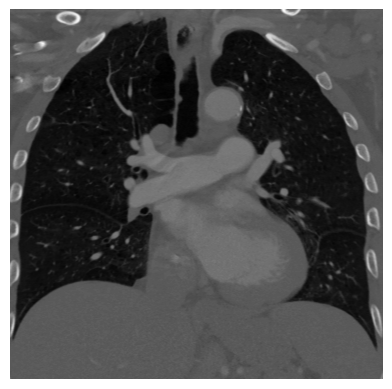

Window Level Adjusted!


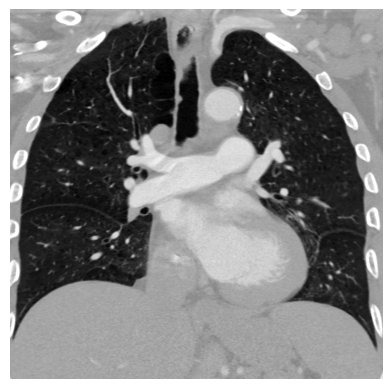

Image saved at: z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [   3.36  337.75 -434.39]
Camera Focal Point [   3.36 -162.25 -434.39]
Origin:  (-126.60000000000001, -256.3, -563.4)
Dimensions:  (684, 495, 679)
Center:  [   3.36 -162.25 -434.39]
Process Completed
All files were found for Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502
Vx3 File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502\Markups\88-Jensen\Vx3.nrrd
Mask File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-24-0.5__QR40__RESEARCH__M_0.6_Qr40d_3_51287502\seg_net\SPI-JH110704-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz
Label File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-24

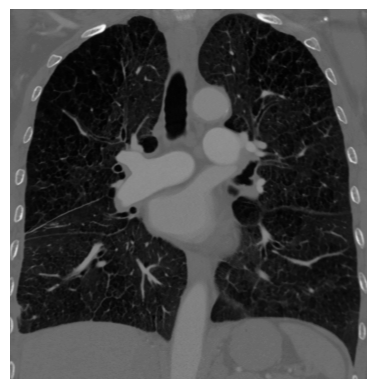

Window Level Adjusted!


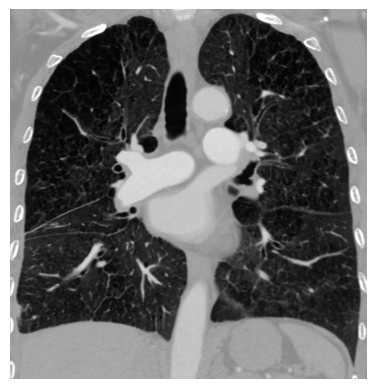

Image saved at: z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/-QC-Image.png
Scale bar added and image saved.
Vseed Segmentation conversion complete.
Aseed.nrrd created!
Aseed Segmentation Conversion Complete
Process Completed
Conversion complete.
yay
yay
yay
Lung conversion complete.
Camera Position [  12.14  368.75 -602.4 ]
Camera Focal Point [  12.14 -131.25 -602.4 ]
Origin:  (-110.60000000000002, -221.5, -729.7)
Dimensions:  (646, 475, 670)
Center:  [  12.14 -131.25 -602.4 ]
Process Completed
All files were found for Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001
Vx3 File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001\Markup\Vx3.nrrd
Mask File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEARCH__A_80KV_Qr40d_53901001\seg_net\SPI-JH112953-PBV_FRC_0.75_Qr40d_VNC.mask.nii.gz
Label File: z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-28-0.75__QR40RESEAR

KeyboardInterrupt: 

In [59]:
# YES WORKING TO FIND ALL THREE FILES CONTAINED WITHIN THE subdirectory 1-DONE
import os
import pandas as pd
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd
from PIL import Image, ImageDraw
import os
import vtk
from mayavi import mlab

excel_file_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/T7-Summary(LocalOld).xlsx'
# Read the Excel file
data = pd.read_excel(excel_file_path, skiprows=[0])

# Define the indices for the columns you're interested in (0-based indexing)
column2_index = 1  # Replace with the correct index for column 2
column3_index = 2  # Replace with the correct index for column 3

# Filter out rows where column 3 has a value but column 2 is blank
filtered_data = data[data.iloc[:, column2_index].notna() | data.iloc[:, column3_index].isna()]

# Extract the second and third columns from the filtered data and convert them to lists
second_column = filtered_data.iloc[:, column2_index].tolist()
third_column = filtered_data.iloc[:, column3_index].tolist()

# Remove 'NaN' values from the lists
indices = [int(value) for value in second_column if not pd.isna(value)]
case_numbers = [int(value) for value in third_column if not pd.isna(value)]

def find_files(folder_path):
    vx3_file = None
    mask_file = None
    label_file = None
    
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file == "Vx3.nrrd":
                vx3_file = os.path.join(root, file)
            elif file.endswith(".mask.nii.gz"):
                mask_file = os.path.join(root, file)
            elif file.endswith("label.nrrd"):
                label_file = os.path.join(root, file)
        
        if vx3_file and mask_file and label_file:
            break  # All files are found, exit the loop
    
    return vx3_file, mask_file, label_file

base_folder = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/"

for case_number in case_numbers:
    case_folder_prefix = f"Case-{case_number}-"
    
    for folder in os.listdir(base_folder):
        if folder.startswith(case_folder_prefix):
            folder_path = os.path.join(base_folder, folder)
            vx3_file, mask_file, label_file = find_files(folder_path)

            if vx3_file and mask_file and label_file:
                print("All files were found for", folder)
                print("Vx3 File:", vx3_file)
                print("Mask File:", mask_file)
                print("Label File:", label_file)
                # 200 FINAL WORKING CODE FOR IMAGE GENERATION FOR ONE CASE
                ############################################################################################################################################################
                # QC IMAGE STUFF
                # Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"
                Vx3Path = vx3_file
                labelpath = label_file
                maskpath = mask_file
                output_path = 'z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/'
                filename = output_path + "-QC-Image.png"
                final_filename = output_path + "-QC-Image(2CM).png"
                Vx3_path = Vx3Path
                
                # 3D Screenshot Stuff check for repeats
                nrrd_file_path = labelpath
                segmentation_path = labelpath
                case_number = folder
                output_path_seg = 'z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/'  # Change this to your desired output directory
                output_nrrd_file_path = "z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/"

                # These filenames are just to have the program run all at the same time
                Aseed_filename_base = case_number + "Aseed"
                Vseed_filename_base = case_number + "Vseed"

                vtk_filename_aseed = f"{Aseed_filename_base}.vtk"
                vtk_filename_vseed = f"{Vseed_filename_base}.vtk"
                output_filename_aseed = output_path_seg + vtk_filename_aseed
                output_filename_vseed = output_path_seg + vtk_filename_vseed
                screenshot_filename = "Model.png"


                models_folder = os.path.join(os.path.dirname(output_path), "QC-Images")
                os.makedirs(models_folder, exist_ok=True)

                # Load the image using nibabel to see image information
                data, header = nrrd.read(Vx3_path)

                # Print the metadata
                print("Data Shape:", data.shape)
                print("Data Type:", data.dtype)
                print("Header:", header)

                # Load the 3D image
                Vx3 = sitk.ReadImage(Vx3_path)
                print("Reading Vx3...")
                # Get the size of the image in x, y, and z dimensions
                size_x, size_y, size_z = Vx3.GetSize()
                spacing = Vx3.GetSpacing()
                y_index = Vx3.GetSize()[1] // 2
                print("Spacing:", spacing)

                # Extract the middle plane along the y-dimension
                slice_2d = Vx3[:,y_index,:]
                slice_array = sitk.GetArrayFromImage(slice_2d)

                # Set the Window level
                window_level_min = -1024  # Adjust these values according to your preference
                window_level_max = 650

                # Apply Window Level to image
                windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
                windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

                #Show Vx3
                plt.imshow(slice_array, cmap="gray",origin='lower')
                plt.axis("off")
                plt.show()
                print("Window Level Adjusted!")

                #Show Vx3 with correct window level
                plt.imshow(windowed_slice_array, cmap="gray",origin='lower')
                plt.axis("off")
                plt.show()

                # Save the Corrected Vx3 .PNG to output path
                output_file_path = os.path.join(models_folder, filename)
                plt.imsave(filename, windowed_slice_array, cmap="gray", origin='lower')
                print("Image saved at:", output_file_path)

                # Load the image
                image_path = filename
                output_path_png = output_path + "-QC-Image(2CM).png"
                image = Image.open(image_path)

                # Determine line position
                line_start_x = 65 # 65 pixels from the left
                line_start_y = image.height - 35 # 35 pixels from the bottom

                # Calculate line end position
                line_end_x = line_start_x + int(20 / 0.38)  # 10 cm converted to pixels
                line_end_y = line_start_y

                # Draw the white line
                draw = ImageDraw.Draw(image)
                draw.line([(line_start_x, line_start_y), (line_end_x, line_end_y)], fill='white', width=2)
                # # Save the modified image
                image.save(output_path_png)

                print("Scale bar added and image saved.")

                #############################################################################################################################################################


                def update_camera_info(obj, evt):
                    camera = mlab.gcf().scene.camera
                    print("Camera Position:", camera.position)
                    print("Camera Focal Point:", camera.focal_point)
                    print("Camera View Up:", camera.view_up)


                # This line creates Models Forlder if not already made
                if not os.path.exists(output_path_seg):
                    os.makedirs(output_path_seg)


                # Load the .nrrd segmentation for Vseed
                nrrd_reader_vseed = vtk.vtkNrrdReader()
                nrrd_reader_vseed.SetFileName(segmentation_path)
                nrrd_reader_vseed.Update()

                vtk_image_data_vseed = vtk.vtkImageData()
                vtk_image_data_vseed.DeepCopy(nrrd_reader_vseed.GetOutput())

                # Define scalar value for "Vseed" segment
                vseed_scalar_value = 2

                # Create a Marching Cubes filter for "Vseed" segment
                contour_vseed = vtk.vtkMarchingCubes()
                contour_vseed.SetInputData(vtk_image_data_vseed)
                contour_vseed.SetValue(0, vseed_scalar_value)
                contour_vseed.Update()

                # Write the "Vseed" mesh to a .vtk file
                vtk_writer_vseed = vtk.vtkPolyDataWriter()
                vtk_writer_vseed.SetFileName(output_filename_vseed) 
                vtk_writer_vseed.SetInputData(contour_vseed.GetOutput())
                vtk_writer_vseed.Write()

                print("Vseed Segmentation conversion complete.")

                # Read the .nrrd file
                data, header = nrrd.read(nrrd_file_path)

                data[data == 2] = 0 
                output_nrrd_file_path = output_path + "Segmentation(Aseed).nrrd"
                # Write the modified data and header to a new .nrrd file
                nrrd.write(output_nrrd_file_path, data, header)
                print("Aseed.nrrd created!")
                # Load the .nrrd segmentation for Aseed
                nrrd_reader_aseed = vtk.vtkNrrdReader()
                nrrd_reader_aseed.SetFileName(output_nrrd_file_path)
                nrrd_reader_aseed.Update()

                vtk_image_data_aseed = vtk.vtkImageData()
                vtk_image_data_aseed.DeepCopy(nrrd_reader_aseed.GetOutput())

                # Define scalar value for "Aseed" segment
                aseed_scalar_value = 1

                # Create a Marching Cubes filter for "Aseed" segment
                contour_aseed = vtk.vtkMarchingCubes()
                contour_aseed.SetInputData(vtk_image_data_aseed)
                contour_aseed.SetValue(0, aseed_scalar_value)
                contour_aseed.Update()

                # Write the "Aseed" mesh to a .vtk file
                vtk_writer_aseed = vtk.vtkPolyDataWriter()
                vtk_writer_aseed.SetFileName(output_filename_aseed) 
                vtk_writer_aseed.SetInputData(contour_aseed.GetOutput())
                vtk_writer_aseed.Write()

                print("Aseed Segmentation Conversion Complete")

                #CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
                screenshot_output = output_path_seg + case_number + screenshot_filename

                mlab.figure(bgcolor=(1, 1, 1))
                srcA = mlab.pipeline.open(output_filename_aseed)
                srcV = mlab.pipeline.open(output_filename_vseed)

                # Create a surface visualization of the data with blue color and 50% opacity
                surfaceA = mlab.pipeline.surface(srcA, color=(0, 151/255, 206/255), opacity=1)
                surfaceV = mlab.pipeline.surface(srcV, color=(216/255, 101/255, 79/255), opacity=1)

                # Find Segmentation Center
                model = sitk.ReadImage(segmentation_path)
                origin = model.GetOrigin()
                dimensions = model.GetSize()
                direction = model.GetDirection()
                spacing = (0.38, 0.38, 0.38)
                distance = np.array(spacing) * np.array(dimensions)
                center = np.array(origin) + np.array(distance) / 2


                x, y, z = center[0], center[1], center[2]
                ypt = y + 500

                camera_focal_point = np.array([x, y, z])
                camera_position = np.array([x,ypt,z])

                # Set the camera parameters
                # Write code to calculate this
                mlab.gcf().scene.camera.position = [x, ypt, z]
                mlab.gcf().scene.camera.focal_point = [x, y, z]
                mlab.gcf().scene.camera.view_up = [0, 0, 1]

                # Attach the callback to the interaction event
                mlab.gcf().scene.interactor.add_observer('MouseMoveEvent', update_camera_info)

                magnification_factor = 5
                mlab.savefig(screenshot_output, magnification=magnification_factor)


                print("Process Completed")

                ###################################################################################################################################################################

                # 2 to fix (nearly done)
                ## THIS CODE WORKS TO MAKE A MODEL AND POSITION IT AT A FAVORABLE ANGLE TO TAKE AN IMAGE OF THE MAYAVI REPRESENTATION OF THE MODEL

                # QC IMAGE STUFF
                # Casename = "H-14479_JH110088_SPI-JH110088-PBV_SPIROMICS_EXPIRATION_PBV__0.5__QR40__RESEARCH__A_80KV_Qr40d_3_53062428"

                # 3D Screenshot Stuff check for repeats
                nrrd_file_path = labelpath
                segmentation_path = labelpath
                # output_nrrd_file_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-59-Spiromics-44556786/Markups/88-Nate/Aseed.nrrd"

                # Path to the input NIfTI file
                input_nifti_path_mask = maskpath
                # Path to save the output NRRD file
                output_nrrd_path_mask = 'z:/Q- Figures&Reports/T32-Poster/Nate/Experiment/Case-59-Lung-Mask.nrrd'
                # Load the NIfTI image
                nifti_image = sitk.ReadImage(input_nifti_path_mask)
                # Create a writer for NRRD format
                nrrd_writer = sitk.ImageFileWriter()
                nrrd_writer.SetFileName(output_nrrd_path_mask)
                # Convert the NIfTI image to a Numpy array
                nifti_array = sitk.GetArrayFromImage(nifti_image)
                # Convert the Numpy array back to a SimpleITK image
                nrrd_image = sitk.GetImageFromArray(nifti_array)
                # Copy information (metadata) from NIfTI image to NRRD image
                nrrd_image.CopyInformation(nifti_image)
                # Write the NRRD image
                nrrd_writer.Execute(nrrd_image)
                print("Conversion complete.")

                masknrrdpath = output_nrrd_path_mask

                # These filenames are just to have the program run all at the same time
                rLung_filename_base = case_number + "Lungs"
                Aseed_filename_base = case_number + "Aseed"

                vtk_filename_rLung = f"{rLung_filename_base}.vtk"
                vtk_filename_Aseed = f"{Aseed_filename_base}.vtk"
                output_filename_rLung = output_path_seg + vtk_filename_rLung
                output_filename_Aseed = output_path_seg + vtk_filename_Aseed
                lung_screenshot_filename = "Lung-Mask-Model.png"
                print("yay")
                # This line creates Models Forlder if not already made
                if not os.path.exists(output_path_seg):
                    os.makedirs(output_path_seg)

                data, header = nrrd.read(output_nrrd_path_mask)
                data[data == 17] = 3
                data[data == 5] = 3
                print("yay")
                # Load the .nrrd segmentation for Vseed
                nrrd_reader_rLung = vtk.vtkNrrdReader()
                nrrd_reader_rLung.SetFileName(output_nrrd_path_mask)
                nrrd_reader_rLung.Update()

                vtk_image_data_rLung = vtk.vtkImageData()
                vtk_image_data_rLung.DeepCopy(nrrd_reader_rLung.GetOutput())

                # Define scalar value for "Vseed" segment
                rLung_scalar_value = 3

                # Create a Marching Cubes filter for "Vseed" segment
                contour_rLung = vtk.vtkMarchingCubes()
                contour_rLung.SetInputData(vtk_image_data_rLung)
                contour_rLung.SetValue(0, rLung_scalar_value)
                contour_rLung.Update()
                print("yay")
                # Write the "Vseed" mesh to a .vtk file
                vtk_writer_rLung = vtk.vtkPolyDataWriter()
                vtk_writer_rLung.SetFileName(output_filename_rLung)
                vtk_writer_rLung.SetInputData(contour_rLung.GetOutput())
                vtk_writer_rLung.Write()
                print("Lung conversion complete.")

                #CHANGE THIS SELECT FOLDER TO SAVE TOO AND FILE NAME OF .PNG
                screenshot_output = output_path_seg + case_number + lung_screenshot_filename
                mlab.figure(bgcolor=(1, 1, 1))
                srcrLung = mlab.pipeline.open(output_filename_rLung)
                srcAseed = mlab.pipeline.open(output_filename_Aseed)

                # Create a surface visualization of the data with blue color and 50% opacity
                surfaceR = mlab.pipeline.surface(srcrLung, color=(128/255, 174/255, 128/255), opacity=.15)
                surfaceAseed = mlab.pipeline.surface(srcAseed, color=(0, 151/255, 206/255), opacity=1)

                x, y, z = center[0], center[1], center[2]
                ypt = y + 500

                camera_focal_point = np.array([x, y, z])
                camera_position = np.array([x,ypt,z])

                print("Camera Position", camera_position)
                print("Camera Focal Point", camera_focal_point)

                # Set the camera parameters
                # Write code to calculate this
                mlab.gcf().scene.camera.position = [x, ypt, z]
                mlab.gcf().scene.camera.focal_point = [x, y, z]
                mlab.gcf().scene.camera.view_up = [0, 0, 1]

                print("Origin: ", origin)
                print("Dimensions: ", dimensions)
                print("Center: ", center)

                # Attach the callback to the interaction event

                magnification_factor = 5
                mlab.savefig(screenshot_output, magnification=magnification_factor)
                
                mlab.show()

                print("Process Completed")

            else:
                print("One or more files were not found for", folder)

            
           
            